# <font color='green'>Multiple Linear Regression</font>

## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They want to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
<b>
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
</b>

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import all the libraries that we would be requiring during this case study and read the <b>Bike Sharing</b> dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset from day.csv

bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.shape

(730, 16)

In [4]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# checking for any null values
bike_sharing.isnull().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# checking for columns datatypes
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- all columns seems to have proper datatype

In [7]:
# checking coulmns in our dataset

bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

- dropping unnecessay variables

1. instant
2. dteday
3. casual
4. registered

In [8]:
bike_sharing.drop(columns={'instant','dteday','casual','registered'},inplace=True)

- Now, from data dictionary we see that `'season'` and `'weathersit'` columns are a categorical variables which represent labels in form of numeric values

So, we would be mapping each numeric value to it's correnponding label.

### season
- 1 is `'spring'`
- 2 is `'summer'`
- 3 is `'fall'`
- 4 is `'winter'`


In [9]:
# mapping numeric values with corresponding labels

bike_sharing['season'] = bike_sharing[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

In [10]:
bike_sharing['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

### weathersit

- 1 is `'Clear, Few clouds, Partly cloudy, Partly cloudy'`
- 2 is `'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'`
- 3 is `'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'`
- 4 is `'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'`

For simplicity we will consider following labels

- 'Clear, Few clouds, Partly cloudy, Partly cloudy' -> `'clear'`
- 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' -> `'cloudy'`
- 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' -> `'lightsnow'`
- 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' -> `'heavysnow'`

In [11]:
# mapping numeric values with corresponding labels

bike_sharing['weathersit'] = bike_sharing[['weathersit']].apply(lambda x: x.map({1:'clear',2:'cloudy',3:'lightsnow',4:'heavysnow'}))

In [12]:
bike_sharing['weathersit'].value_counts()

clear        463
cloudy       246
lightsnow     21
Name: weathersit, dtype: int64


- Similarly, we can conclude that `'mnth'` & `'weekday'` are also categorical variables, but we would let them be as they are and let the model handle it

- `'yr'`, `'holiday'` & `'workingday'` are binary categorical variables

In [13]:
bike_sharing.shape

(730, 12)

In [14]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

**understanding the data** is the most important step and to do it we will use visualization techniques.

We can get following inferences from visualizing data
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Visualizing Continuous Numeric Variables

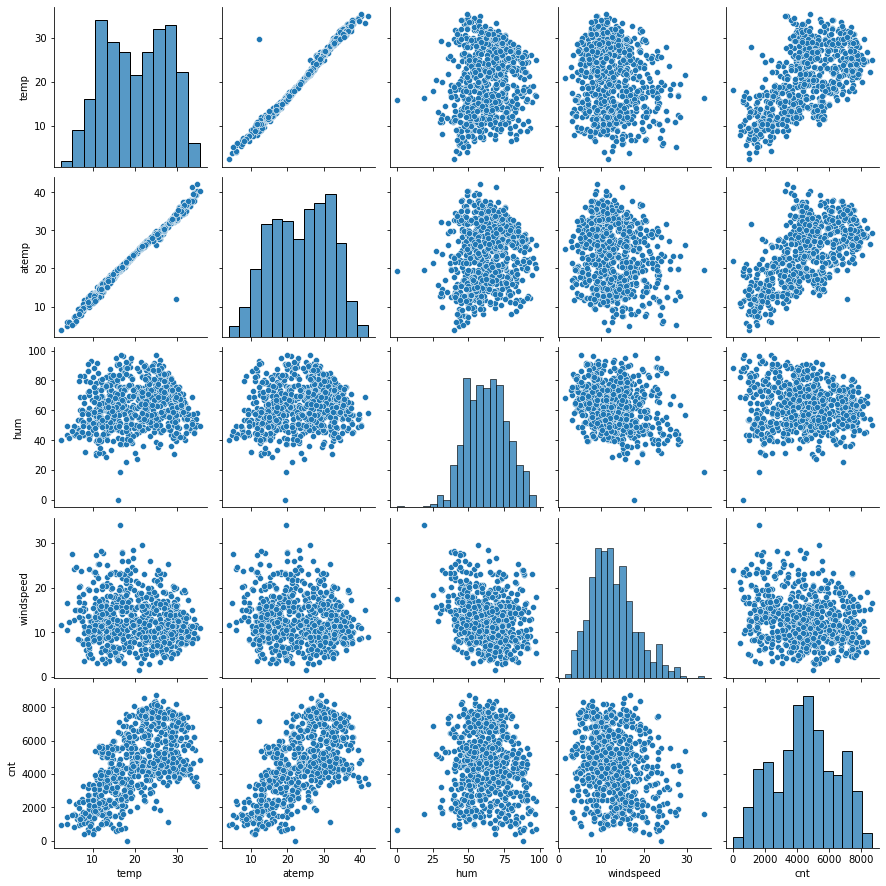

In [15]:
# pairplot for identifying relationship among pair of variables

sns.pairplot(bike_sharing[['temp','atemp','hum','windspeed','cnt']])

- there is linear relationship visible between `'temperature'` and `'cnt'` 
- as we can see there is a **very good linear relationship** between `'temp & atemp'`, we can choose to drop one of these columns to **avoid collinearity problem** later while building the model.

In [16]:
# dropping 'temp' variable

bike_sharing.drop(columns='temp',inplace=True)

In [17]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600


### Visualizing Categorical Variables

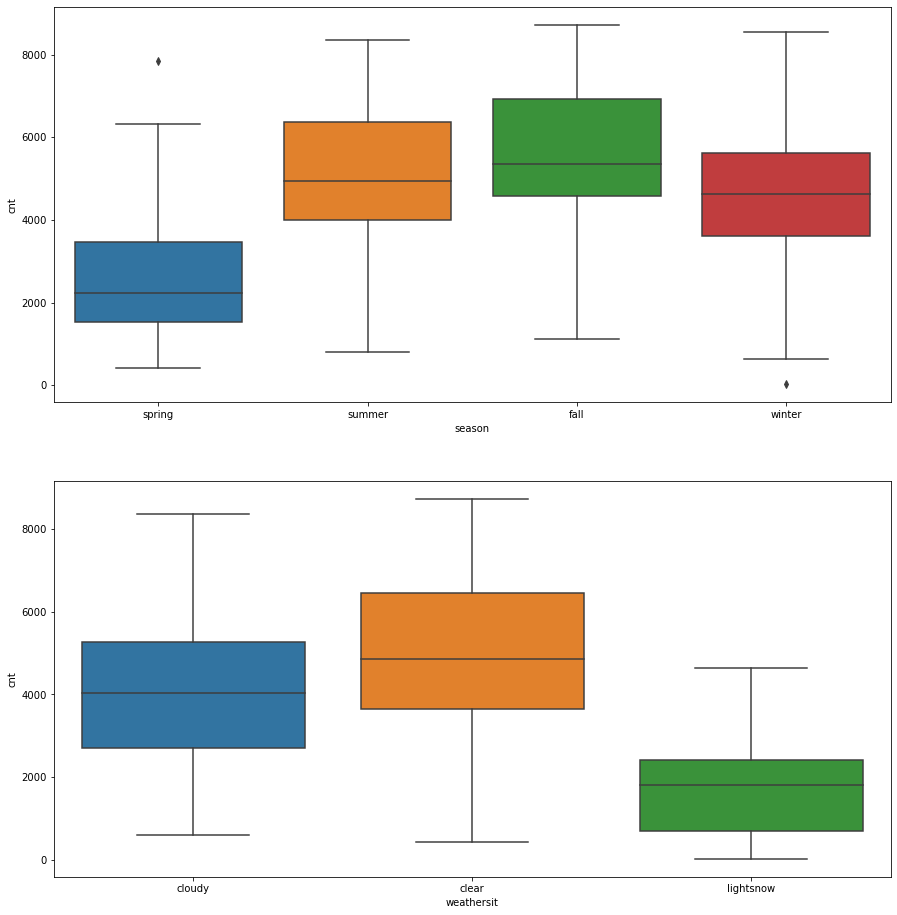

In [18]:
# plotting boxplot of categorical variables 

plt.figure(figsize=(15,16))
plt.subplot(2,1,1)
sns.boxplot(data=bike_sharing,x='season',y='cnt')
plt.subplot(2,1,2)
sns.boxplot(data=bike_sharing,x='weathersit',y='cnt')
plt.show()

-	`'season'`: Demand of rental bikes in the season of spring were relatively less with compare to that in other seasons. Fall season saw the maximum demand of rental bikes, followed by summer and winter.
    
- `'weathersit'`: As expected, people do not use bikes in heavy rain/snow situation. They prefer to ride bikes mostly in clear and cloudy weather. Also, relatively less population uses rental bikes in light snow weather.

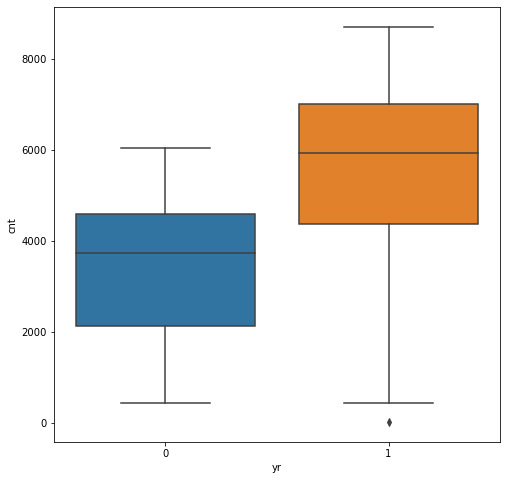

In [19]:
# plotting boxplot of categorical variables 

plt.figure(figsize=(8,8))
sns.boxplot(data=bike_sharing,x='yr',y='cnt')
plt.show()

-	**yr** : In 2018, the mean number of rental bikes in a day was around 3800 whereas it was nearly 6000 in the year 2019. This represents an increase in business and also increase in customer size.

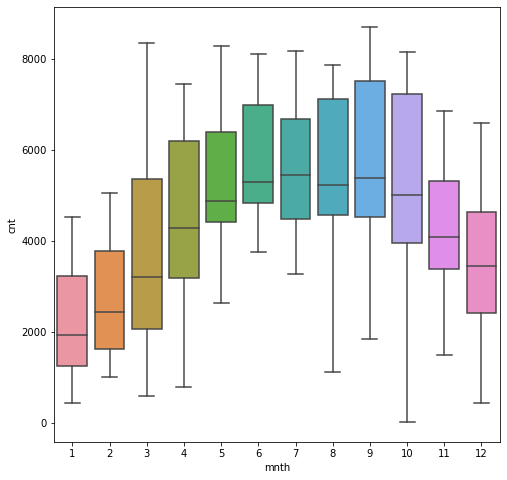

In [20]:
# plotting boxplot of categorical variables 

plt.figure(figsize=(8,8))
sns.boxplot(data=bike_sharing,x='mnth',y='cnt')
plt.show()

-	**mnth**: We can see that the peak in demand of rental bikes were in the middle months, i.e., from June till September. The demand keeps on steadily increasing from Jan till July and then till September it remains almost same and then towards the end of the year it decreases steadily.

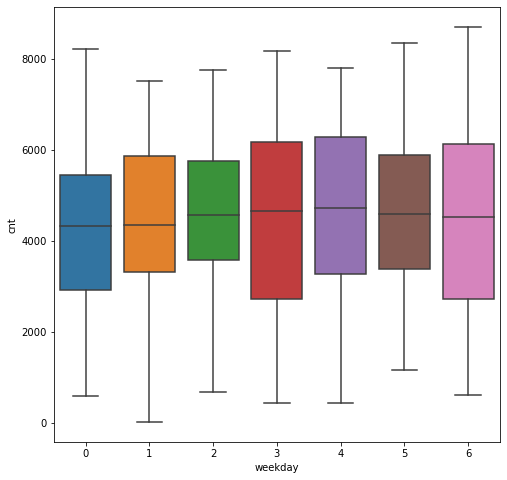

In [21]:
# plotting boxplot of categorical variables 

plt.figure(figsize=(8,8))
sns.boxplot(data=bike_sharing,x='weekday',y='cnt')
plt.show()

- **weekday**: there was no major effect of weekday in the demand of bikes as the mean of all weekdays were almost near to each other, about 4300

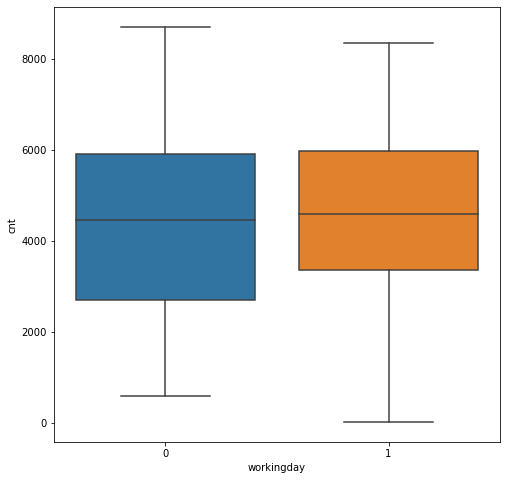

In [22]:
# plotting boxplot of categorical variables 

plt.figure(figsize=(8,8))
sns.boxplot(data=bike_sharing,x='workingday',y='cnt')
plt.show()

- **workingday**: workingday also did not have any major effect on demand of the bikes

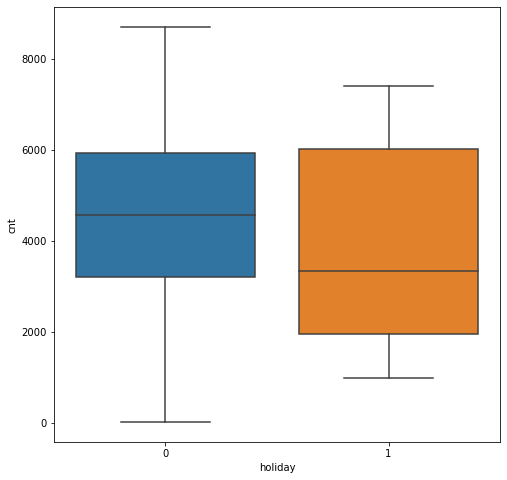

In [23]:
# plotting boxplot of categorical variables 

plt.figure(figsize=(8,8))
sns.boxplot(data=bike_sharing,x='holiday',y='cnt')
plt.show()

- **holiday**: people uses rental bikes more on non-holidays than on holidays.

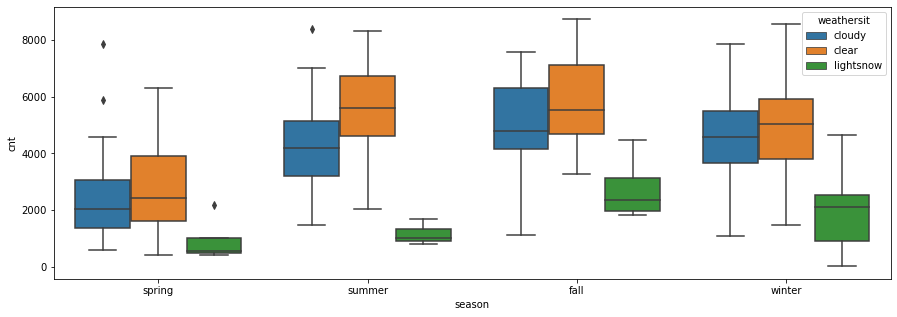

In [24]:
# plotting boxplot with hue of categorical variables (between season,weathersit and cnt)

plt.figure(figsize = (15, 5))
sns.boxplot(data=bike_sharing,x = 'season', y = 'cnt', hue = 'weathersit')
plt.show()

- demand of bikes is maximun in **clear** weather, followed by cloudy weather and least in light snow/rain weather

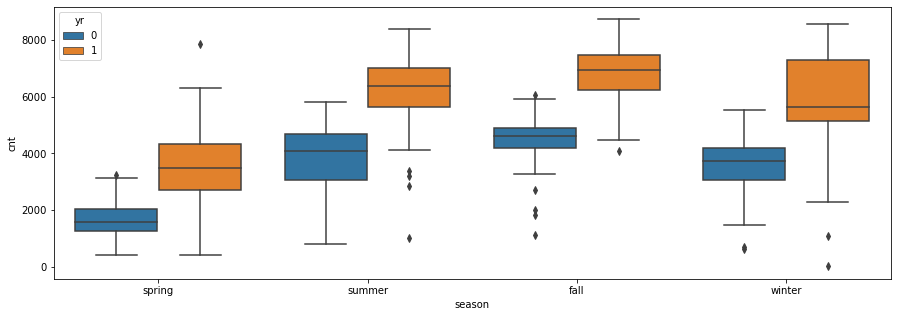

In [25]:
# plotting boxplot with hue of categorical variables (between season, yr and cnt)

plt.figure(figsize = (15, 5))
sns.boxplot(data=bike_sharing,x = 'season', y = 'cnt', hue = 'yr')
plt.show()

- demand have increased in all seasons of 2019 from that in 2018

## Step 3: Data Preparation

### Dummy Variables

- preparing dummy variables for `'season'` column and concating them to the **bike_sharing** dataframe.

In [26]:
season = pd.get_dummies(bike_sharing['season'], drop_first=True)
bike_sharing = pd.concat([bike_sharing,season],axis=1)


In [27]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600,1,0,0


In [28]:
# dropping season variable from dataframe as it is no longer required

bike_sharing.drop(columns=['season'],inplace=True)


In [29]:
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600,1,0,0


- preparing dummy variables for `'weathersit'` column and concating them to the **bike_sharing** dataframe.

In [30]:
weather = pd.get_dummies(bike_sharing['weathersit'],drop_first=True)
bike_sharing = pd.concat([bike_sharing,weather],axis=1)

In [31]:
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,cloudy,lightsnow
0,0,1,0,6,0,cloudy,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,cloudy,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [32]:
# dropping weathersit variable from dataframe as it is no longer required

bike_sharing.drop(columns={'weathersit'},inplace=True)

In [33]:
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,cloudy,lightsnow
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [34]:
# splitting dataset into 70:30 ratio for training and testing

df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

- We will be using **MinMaxScaling** method to scale the features of our dataset

In [35]:
# creating MinMaxScaler object 

scaler = MinMaxScaler()

In [36]:
# getting column name of all the columns of our dataset

bike_sharing.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'cloudy',
       'lightsnow'],
      dtype='object')

In [38]:
# Apply scaler() to all the columns
num_vars = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'cloudy',
       'lightsnow']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

**<font color='red'>Note</font>** : We are applying scaler to all the features including binary categorical variable and dummy variables, these columns have **0 & 1** values only, so even after scaling them with Min-Max Scaling method, their values will remain same.

- If we were to apply any other scaling method such as **Standardisation** method then we would have not applied it to binary categorical & dummy variables

In [39]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,cloudy,lightsnow
653,1.0,0.818182,0.0,0.333333,1.0,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,0.0,0.0
576,1.0,0.545455,0.0,0.333333,1.0,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0,0.0
426,1.0,0.181818,0.0,1.000000,0.0,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,1.0,0.0
728,1.0,1.000000,0.0,0.000000,0.0,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,0.0,0.0
482,1.0,0.272727,0.0,1.000000,0.0,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,1.0,0.0


In [40]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,cloudy,lightsnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


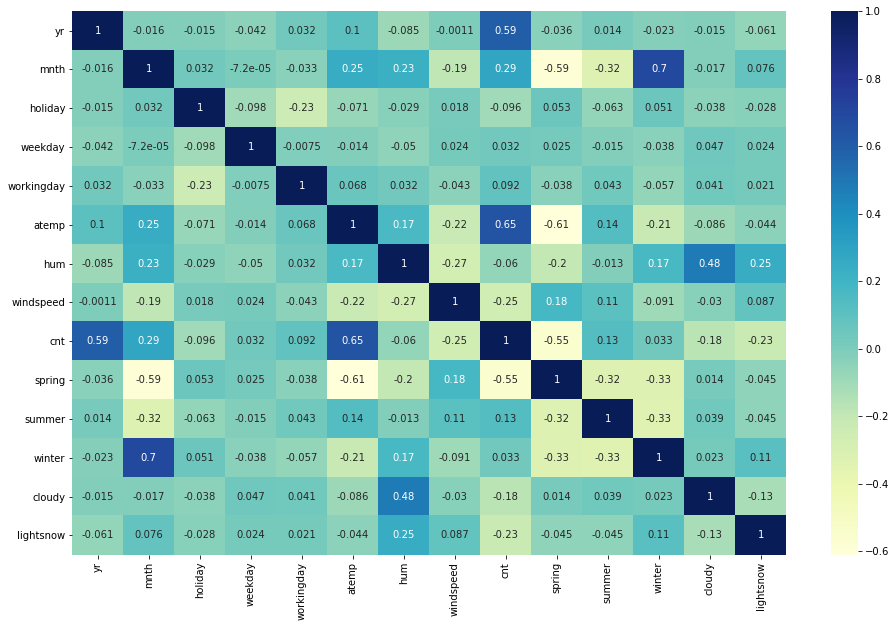

In [41]:
# checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- our target variable `'cnt'` has a strongest positive correlation with `'atemp'` independent variable, followed by `'yr'`
- `'cnt'` have strongest negative correlation with `'spring'` variable


<hr></hr>


- we can see that `'spring'` have high colinearlity with `'mnth'` & `'atemp'` variables.
- we can decide to drop it now, but we will let **Recursive Feature Elimination (RFE)** method to handle it

Similarly,
- `'winter'` and `'mnth'` have high colinearity and we will ignore it for now

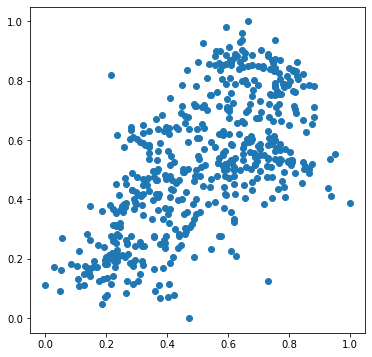

In [42]:
# plotting 'atemp' & 'cnt' variable using scatterplot

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model using RFE

In [44]:
X_train.shape

(510, 13)

In [45]:
# Running RFE with the output number of the variables equal to 10
# I came up with 10 number because in heatmap i saw that there were 10 variables 
# that had correlation coefficient more than 0.1 (this number can be changed as per requirement)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)           
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('lightsnow', True, 1)]

In [47]:
# printing the columns that are most significant according to RFE method

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'cloudy', 'lightsnow'],
      dtype='object')

In [48]:
# printing the columns that are eliminated by RFE method

X_train.columns[~rfe.support_]

Index(['mnth', 'workingday', 'summer'], dtype='object')

### Building model using statsmodels, for the detailed statistics

In [49]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [50]:
# Adding a constant variable 

X_train_sm = sm.add_constant(X_train_rfe)

In [51]:
# Running the linear model

lm = sm.OLS(y_train,X_train_sm).fit()   

In [52]:
# printing summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.0
Date:                Mon, 31 May 2021   Prob (F-statistic):          4.18e-183
Time:                        12:16:10   Log-Likelihood:                 486.30
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     499   BIC:                            -904.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3077      0.033      9.242      0.000       0.242       0.373
yr             0.2344      0.008     27.647      0.000       0.218       0.251
holiday       -0.0749      0.027     -2.797      0.005      -0.127      -0.022
weekday        0.0492      0.013      3.906      0.000       0.024       0.074
atemp          0.4586      0.031     14.601      0.000       0.397       0.520
hum           -0.1159      0.039     -2.955      0.003      -0.193      -0.039
windspeed     -0.1556      0.027     -5.843      0.000      -0.208      -0.103
spring        -0.1228      0.015     -8.032      0.000      -0.153      -0.093
winter         0.0474      0.013      3.761      0.000       0.023       0.072
cloudy        -0.0592      0.011     -5.369      0.000      -0.081      -0.038
lightsnow     -0.2482      0.028     -9.011      0.000      -0.302      -0.194
==============================================================================
Omnibus:                       81.599   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.241
Skew:                          -0.813   Prob(JB):                     4.46e-45
Kurtosis:                       5.640   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- we can see that p-value of all variables/features is less than 0.05, so we can say that all these features are **statistically significant**

In [53]:
# Calculating the VIFs for each independent variable

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,22.24
3,atemp,13.42
5,windspeed,3.96
2,weekday,3.07
6,spring,2.52
8,cloudy,2.24
0,yr,2.05
7,winter,2.03
9,lightsnow,1.21
1,holiday,1.05


- as `'hum'` variable have VIF more than 10, we will be dropping that variable

In [54]:
# drooping `hum` from training set
X_train_new = X_train_rfe.drop(columns='hum')

- Now lets create new model without `'hum'` variable

In [55]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.5
Date:                Mon, 31 May 2021   Prob (F-statistic):          1.88e-182
Time:                        12:16:10   Log-Likelihood:                 481.87
No. Observations:                 510   AIC:                            -943.7
Df Residuals:                     500   BIC:                            -901.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2429      0.025      9.618      0.000       0.193       0.293
yr             0.2372      0.008     27.929      0.000       0.220       0.254
holiday       -0.0751      0.027     -2.786      0.006      -0.128      -0.022
weekday        0.0528      0.013      4.180      0.000       0.028       0.078
atemp          0.4373      0.031     14.195      0.000       0.377       0.498
windspeed     -0.1342      0.026     -5.196      0.000      -0.185      -0.083
spring        -0.1253      0.015     -8.146      0.000      -0.156      -0.095
winter         0.0406      0.012      3.248      0.001       0.016       0.065
cloudy        -0.0783      0.009     -8.679      0.000      -0.096      -0.061
lightsnow     -0.2805      0.025    -11.004      0.000      -0.331      -0.230
==============================================================================
Omnibus:                       79.979   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.387
Skew:                          -0.811   Prob(JB):                     1.67e-42
Kurtosis:                       5.534   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Again p-value of all variables is less than 0.05, so no need to drop any variable based on p-values
- Now let's check VIF of all independent features

In [56]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,4.27
4,windspeed,3.92
2,weekday,3.05
0,yr,2.05
5,spring,1.74
7,cloudy,1.51
6,winter,1.40
8,lightsnow,1.08
1,holiday,1.05


- As P-value of all variables are less then 0.05
- And VIF score of all variables is also less than 5
- **We can say that our model is ready**

## Residual Analysis of the train data

In [57]:
y_train_pred = lm.predict(X_train_sm)

In [58]:
# calculating r2 on the training data

r2_score(y_true=y_train,y_pred=y_train_pred)

0.824247761862313

Text(0.5, 0, 'Errors')

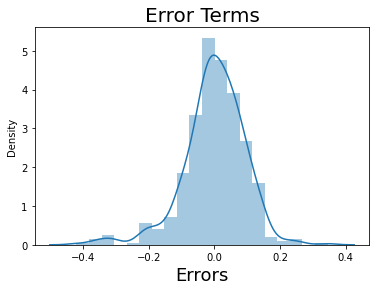

In [59]:
# Plot the distribution plot of the error terms/residuals

sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)             
plt.xlabel('Errors', fontsize = 18)                         

- **error terms** are normally distributed with mean Zero

Text(0, 0.5, 'y_train_pred')

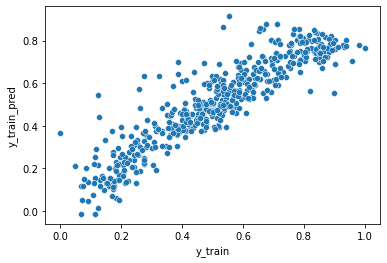

In [60]:
# plotting scatter plot for y_train and y_train_pred

sns.scatterplot(y_train,y_train_pred)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

Text(0, 0.5, 'residuals')

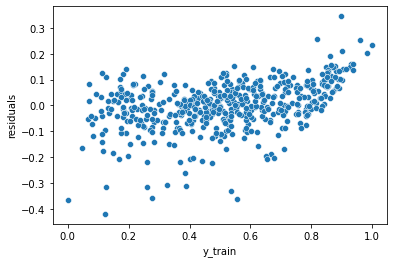

In [61]:
# plotting scatter plot of y_train and residuals

sns.scatterplot(y_train,y_train - y_train_pred)
plt.xlabel('y_train')
plt.ylabel('residuals')

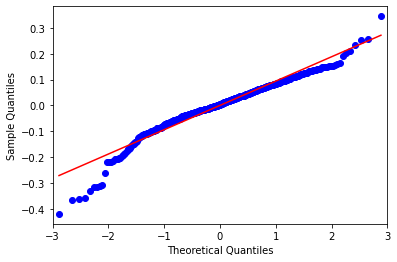

In [62]:
## plotting qq plot on the residuals

fig = sm.qqplot(y_train - y_train_pred,line='s')
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [63]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
# taking only those variables which are needed to our model

X_test_new = X_test[X_train_new.columns]

X_test_sm = sm.add_constant(X_test_new)    # adding constant to the test input data

In [66]:
# predicting the test data
y_test_pred = lm.predict(X_test_sm)

## Residual Analysis of the test data

Text(0.5, 0, 'Errors')

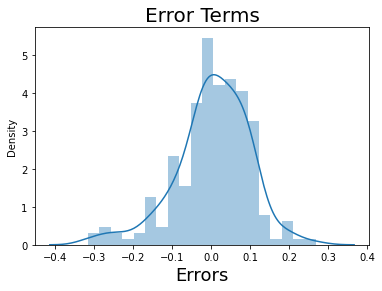

In [67]:
# Plot the distribution plot of the error terms

sns.distplot((y_test - y_test_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)             
plt.xlabel('Errors', fontsize = 18)                         

- **error terms** are normally distributed with mean Zero

Text(0, 0.5, 'y_test_pred')

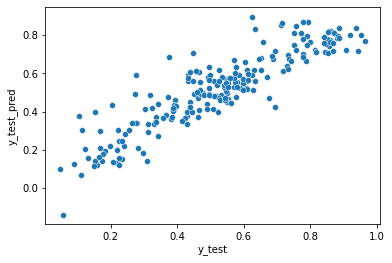

In [68]:
# plotting scatter plot for y_test and y_test_pred

sns.scatterplot(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

Text(0, 0.5, 'residuals')

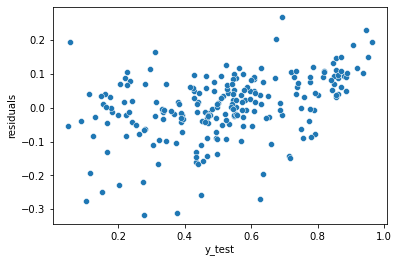

In [69]:
# plotting scatter plot of y_test and residuals

sns.scatterplot(y_test,y_test - y_test_pred)
plt.xlabel('y_test')
plt.ylabel('residuals')

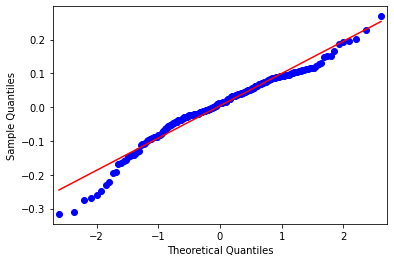

In [70]:
## plotting qq plot on the residuals

fig = sm.qqplot(y_test - y_test_pred,line='s')
plt.show()

## Model Evaluation

Text(0, 0.5, 'Predicted Value')

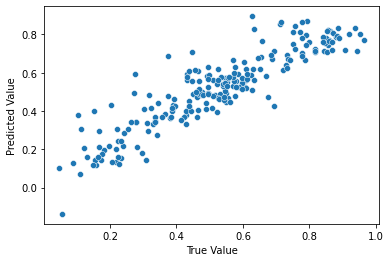

In [71]:
sns.scatterplot(y_test,y_test_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [72]:
# calculating R2 on the testing data

r2_score(y_true=y_test,y_pred=y_test_pred)

0.8075893712350645

In [73]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.5
Date:                Mon, 31 May 2021   Prob (F-statistic):          1.88e-182
Time:                        12:16:14   Log-Likelihood:                 481.87
No. Observations:                 510   AIC:                            -943.7
Df Residuals:                     500   BIC:                            -901.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2429      0.025      9.618      0.000       0.193       0.293
yr             0.2372      0.008     27.929      0.000       0.220       0.254
holiday       -0.0751      0.027     -2.786      0.006      -0.128      -0.022
weekday        0.0528      0.013      4.180      0.000       0.028       0.078
atemp          0.4373      0.031     14.195      0.000       0.377       0.498
windspeed     -0.1342      0.026     -5.196      0.000      -0.185      -0.083
spring        -0.1253      0.015     -8.146      0.000      -0.156      -0.095
winter         0.0406      0.012      3.248      0.001       0.016       0.065
cloudy        -0.0783      0.009     -8.679      0.000      -0.096      -0.061
lightsnow     -0.2805      0.025    -11.004      0.000      -0.331      -0.230
==============================================================================
Omnibus:                       79.979   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.387
Skew:                          -0.811   Prob(JB):                     1.67e-42
Kurtosis:                       5.534   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<hr></hr>


We can see that the equation of our best fitted line is:

$ cnt = 0.243 + 0.2372  \times  yr - -0.0751  \times  holiday + 0.0528 \times weekday + 0.4373 \times atemp - 0.1342 \times windspeed - 0.1253 \times spring + 0.0406 \times winter - 0.0783 \times cloudy - 0.2805 \times lightsnow $


<hr>